#### Import Python Packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

##  <b>TASK:</b> Detecting Circles 
###  Introduction to the TASK 
In this assignment you will learn
- How to detect shapes (i.e. Circules) in a given RGB Image

#### Description of TASK 
- The execricse is to detect the circles in the given image which are coines.
- We will use `opencv-python` for this exercise

### 1. Read Image
Let us read the image `coins.jpg` (which contains several coins) and convert to standard RGB format

The image size is:   (683, 1028, 3)
...


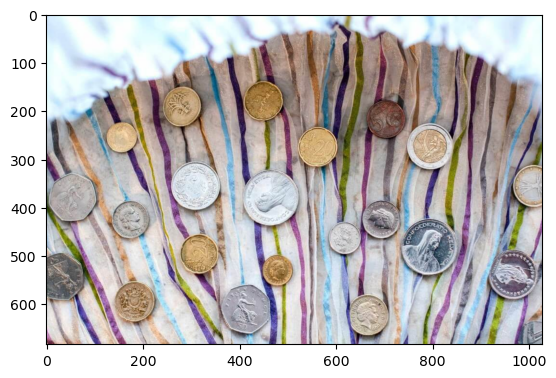

In [3]:

img = cv2.imread('coins.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cimg = img.copy();
print("The image size is:  ", img.shape);
print("...")
plt.imshow(img);

### 2. Convet to Gray-Scale and Blur the Image 
In order to pass the image to method `cv2.HoughCircles()`, we need to convert it to gray-scale and blur the image
- The `cv2.medianBlur()` does the job.

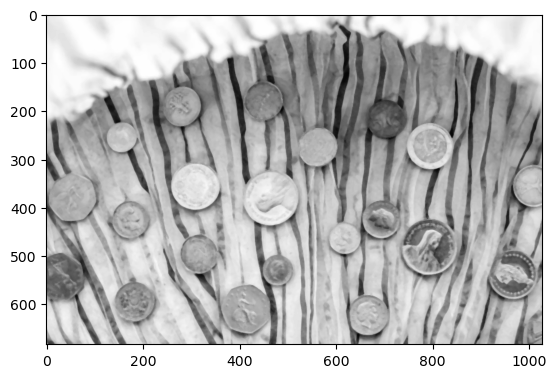

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
blurred = cv2.medianBlur(gray, 5)
plt.imshow(blurred,cmap='gray', vmin=0, vmax=255)

### 3. Finds Circles
Now we will finds the circles in the grayscale image using the Hough transform with method `circles = cv2.HoughCircles(parameters)`.  
The **parameters** are as follows:
- image = img_blur
- method = cv2.HOUGH_GRADIENT
- dp = ?
- minDist = ?
- param1 = 110
- param2 = 39
- maxRadius = 70  

Convert the `circles` to `np.uint16`

In [9]:
circles = cv2.HoughCircles(blurred,cv2.HOUGH_GRADIENT, dp=1, minDist = 38, param2 = 39,maxRadius = 70)
circles = np.uint16(np.around(circles))

print(f'Shape of the Circles  =  {circles.shape}')

Shape of the Circles  =  (1, 20, 3)


### 4. Draw Circles
Finally, let's draw and show the circles we justed detected.

Number of circles detected: 20
...


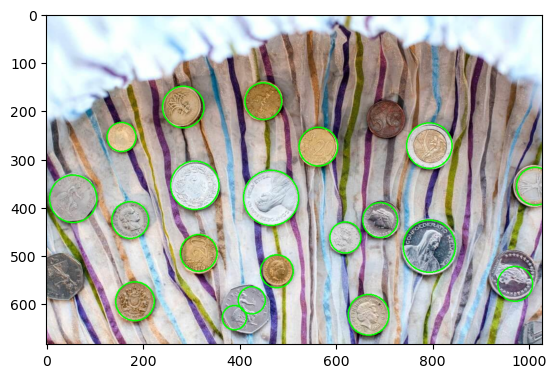

In [10]:
#
# YOUR CODE HERE
co =circles.shape[1]
for i in range(co):
    cv2.circle(cimg, (circles[0][i][0], circles[0][i][1]), circles[0][i][2], (0,255,0),2)
# Stop Code Here
#
# print the number of circles detected
print("Number of circles detected:", co)
print("...")
# save the image, convert to BGR to save with proper colors
cv2.imwrite("coins_circles_detected.png", cimg)
# show the image
plt.imshow(cimg)
plt.show()